# Disk Space

---

In [23]:
from oak_cli.evaluation.addons.flops.utils.imports import *

In [24]:
prepare_notebook()

In [25]:
df, normalized_df, singular_run_df, trained_model_df = load_and_prepare_data(evaluation=Evaluation.SIMPLEST)

---

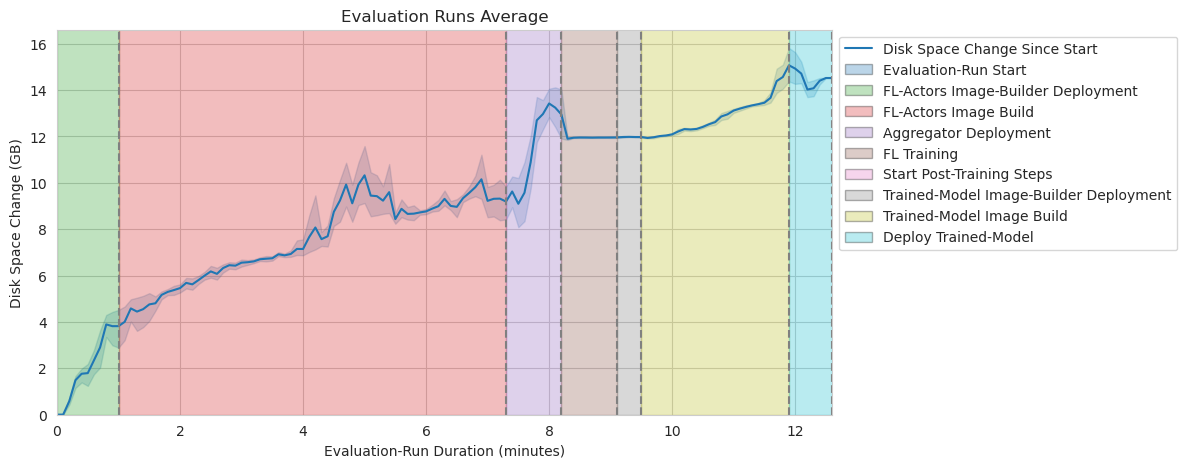

In [26]:
draw_disk_space_linegraph(normalized_df)

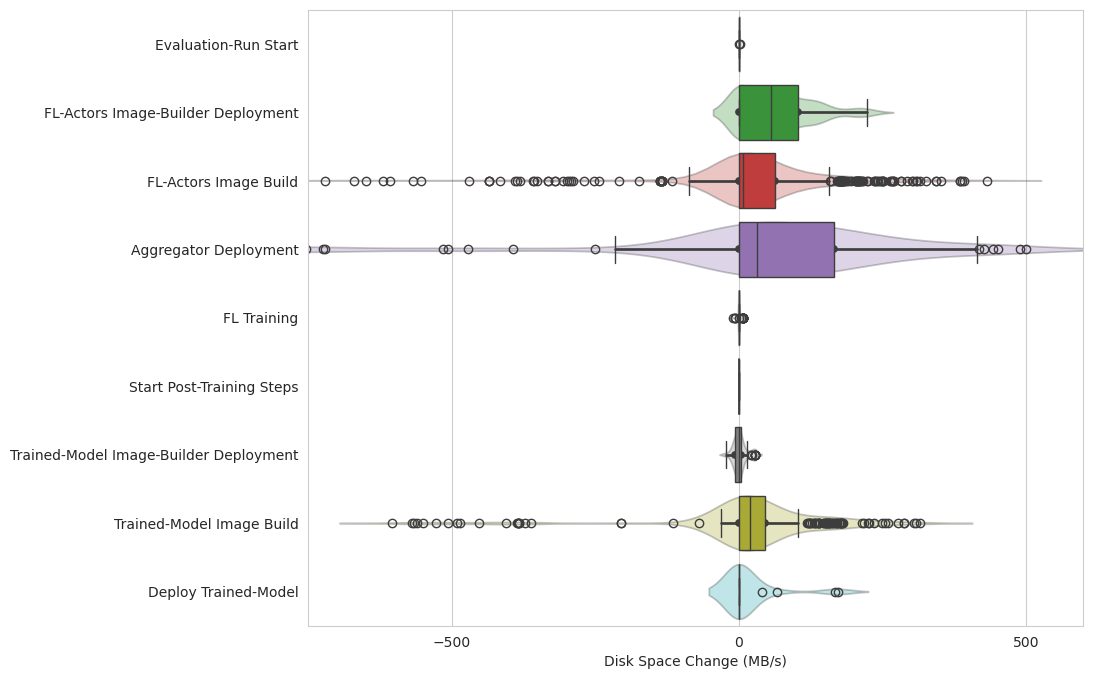

In [27]:
draw_box_violin_plot_for_each_stage_for_disk_space(df)

/tmp/ipykernel_540875/3085396213.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


TypeError: Axes.bxp() got an unexpected keyword argument 'ci'

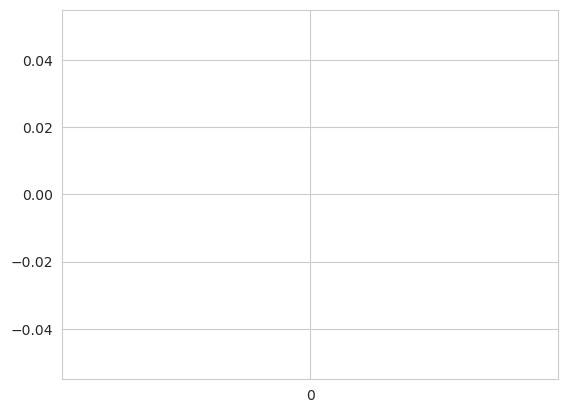

In [31]:
max_y = singular_run_df[DISK_LAST_KEY].max()
_test = singular_run_df.copy()
#_test[["Disk MB/s"]] = round(_test[[DISK_LAST_KEY]] / 5, 1)
_test[["Disk MB/s"]] = round(_test[[DISK_LAST_KEY]] / 5, 0)
# draw_graph(
#     size=(10,5),
#     title="Singular Example Evaluation Run",
#     #data=_test[["Disk MB/s", DISK_LAST_KEY, STAGE_KEY]],
#     data=_test[[CPU_KEY]],
#     plot_functions=[
#         lambda: sns.barplot(
#             #data=singular_run_df[[DISK_LAST_KEY, STAGE_KEY]],
#             #data=_test[["Disk MB/s"]],
#             # x=TIME_START_KEY,
#             data=_test[[CPU_KEY]],
#             x=TIME_START_KEY,
#             y=CPU_KEY
#             #y="Disk MB/s",
#         )
#     ],
#     y_label="Disk Space Change Between Measurements (MB)",
#     x_lim=(0, max(singular_run_df.index)),
#     # show_stages=True,
#     # stages_color_height=max_y,
#     #y_lim=(0, max_y)
#     #y_lim=(-1000, 1000)
# )

_test.reset_index(inplace=True)
#ic(_test[[TIME_START_KEY]])
#_test[[TIME_START_KEY]] = _test[(_test[TIME_START_KEY]*10) % 5 == 0 ]

# _test[[TIME_START_KEY]] = _test[[TIME_START_KEY]].apply(
#         lambda time: myround(time)
#     )

#_test[TIME_START_KEY] = _test[TIME_START_KEY].apply(myround)
_test[TIME_START_KEY] = round(_test[TIME_START_KEY]).astype(int)

#ic(_test[TIME_START_KEY])

#_test[TIME_START_KEY] = myround(_test[TIME_START_KEY])
#_test[[TIME_START_KEY]] = myround(_test[[TIME_START_KEY]])
#ic(_test[[TIME_START_KEY]])
#_test = _test[[TIME_START_KEY, CPU_KEY, STAGE_KEY]]
#_test[[TIME_START_KEY]] = pd.to_datetime(_test[[TIME_START_KEY]])
#_test = _test.groupby(pd.Grouper(key=TIME_START_KEY, freq="30s")).mean()
_test.set_index(TIME_START_KEY, inplace=True)
# sns.barplot(
#     #data=singular_run_df[[DISK_LAST_KEY, STAGE_KEY]],
#     #data=_test[["Disk MB/s"]],
#     # x=TIME_START_KEY,
#     data=_test[[CPU_KEY]],
#     x=TIME_START_KEY,
#     y=CPU_KEY
#     #y="Disk MB/s",
# )


# draw_graph(
#     size=(15,5),
#     title="Singular Example Evaluation Run",
#     #data=_test[["Disk MB/s", DISK_LAST_KEY, STAGE_KEY]],
#     data=_test[[CPU_KEY, STAGE_KEY]],
#     plot_functions=[
#         lambda: sns.barplot(
#             #data=singular_run_df[[DISK_LAST_KEY, STAGE_KEY]],
#             #data=_test[["Disk MB/s"]],
#             # x=TIME_START_KEY,
#             data=_test[[CPU_KEY, STAGE_KEY]],
#             x=TIME_START_KEY,
#             y=CPU_KEY,
#             #y="Disk MB/s",
#             #palette=PALETTE,
#             palette=pallete_dict,
#         )
#     ],
#     y_label="Disk Space Change Between Measurements (MB)",
#     #x_lim=(0, max(singular_run_df.index)),
#     #show_stages=True,
#     # stages_color_height=max_y,
#     #y_lim=(0, max_y)
#     #y_lim=(-1000, 1000)
# )

from oak_cli.evaluation.addons.flops.utils.stages.auxiliary import (
    get_stage_color_mapping,
)

stage_color_map = get_stage_color_mapping(use_stage_names_as_keys=True)

test_dict = {}
for i, row in _test.iterrows():
    color = stage_color_map[row[STAGE_KEY]]
    test_dict[str(i)] = color
    #ax.bar(i, row[CPU_KEY], color=color)


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#sns.barplot(
sns.boxplot(
    #data=singular_run_df[[DISK_LAST_KEY, STAGE_KEY]],
    data=_test,
    #data=_test[["Disk MB/s"]],
    # x=TIME_START_KEY,
    #data=_test[[CPU_KEY, STAGE_KEY]],
    x=TIME_START_KEY,
    #y=CPU_KEY,
    y="Disk MB/s",
    palette=test_dict,
    ax=ax,
    #ci=None,
)

plt.show()